In [1]:
# prevent unnecessary display of IPython warnings
import warnings
warnings.filterwarnings('ignore')

# import necessary libraries and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# define stock/ETF ticker symbols for analysis
symbols = ['AAPL','AMZN','DIA','FB','MSFT','NFLX','SPY','TSLA','TWTR','XOM']

# initialize simple RNN portfolio DataFrame with dates from 1/1/1970 to today
portfolio_df = pd.DataFrame(columns=['Date'])
num_days = (datetime.today() - datetime(1970,1,1)).days
portfolio_df['Date'] = [datetime.today() - timedelta(days=x) for x in range(num_days)]
portfolio_df['Date'] = pd.to_datetime(portfolio_df['Date'].dt.date)

# initialize line plot for all RNN results
plt.figure(figsize=(20,15))

# Perform the following for every ticker symbol
for s in symbols:
    sym_df = pd.read_csv('Results Data/'+s+'_results.csv').iloc[:,[0,1]] # Read in results data as a DataFrame
    sym_df['Date'] = pd.to_datetime(sym_df.Date) # Convert Date object column to Datetime data type
    plt.plot(sym_df.Date,sym_df.iloc[:,1],label=s) # Create a line plot that will be stacked on with other plots
    
    # Merge all results data into the simple RNN portfolio DataFrame
    portfolio_df = portfolio_df.merge(sym_df,how='left',on='Date') 
    
    # Rename columns in simple RNN portfolio DataFrame
    portfolio_df.rename(columns={'portfolio':s+'_portfolio'},inplace=True) 

# Plot a horizontal dashed line to mark the starting investment of $1000 for comparing between stocks/ETFs
plt.hlines(y=1000, 
           xmin=datetime(1970,1,1), 
           xmax = datetime.today(), 
           colors = 'black', 
           linestyles='dashed', 
           label='Starting Investment',
           linewidth = 2)

plt.legend(loc='best')
plt.title('Simple RNN Results')
plt.yscale('log') # Use a log scale on the y-axis
plt.show()

<Figure size 2000x1500 with 1 Axes>

In [2]:
# Replace missing values with zeros
portfolio_df.fillna(0,inplace=True)

# Define Total column to show overall account balance over time
portfolio_df['Total'] = portfolio_df.iloc[:,1:].sum(axis=1)
portfolio_df[portfolio_df.Total!=0]

,Date,AAPL_portfolio,AMZN_portfolio,DIA_portfolio,FB_portfolio,MSFT_portfolio,NFLX_portfolio,SPY_portfolio,TSLA_portfolio,TWTR_portfolio,XOM_portfolio,Total
25,2020-08-21,0.0,360.277299,0.000000,0.0,0.0,0.0000,0.0,0.0,2450.073955,0.0,2810.351254
26,2020-08-20,0.0,0.000000,1329.187081,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,1329.187081
29,2020-08-17,0.0,360.277299,0.000000,0.0,0.0,0.0000,0.0,0.0,2450.073955,0.0,2810.351254
32,2020-08-14,0.0,0.000000,1324.423993,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,1324.423993
33,2020-08-13,0.0,0.000000,0.000000,0.0,0.0,413.1194,0.0,0.0,0.000000,0.0,413.119400
...,...,...,...,...,...,...,...,...,...,...,...,...
18274,1970-09-04,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.0,0.000000,1000.0,1000.000000
18278,1970-08-31,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.0,0.000000,1000.0,1000.000000
18284,1970-08-25,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.0,0.000000,1000.0,1000.000000
18290,1970-08-19,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.0,0.000000,1000.0,1000.000000


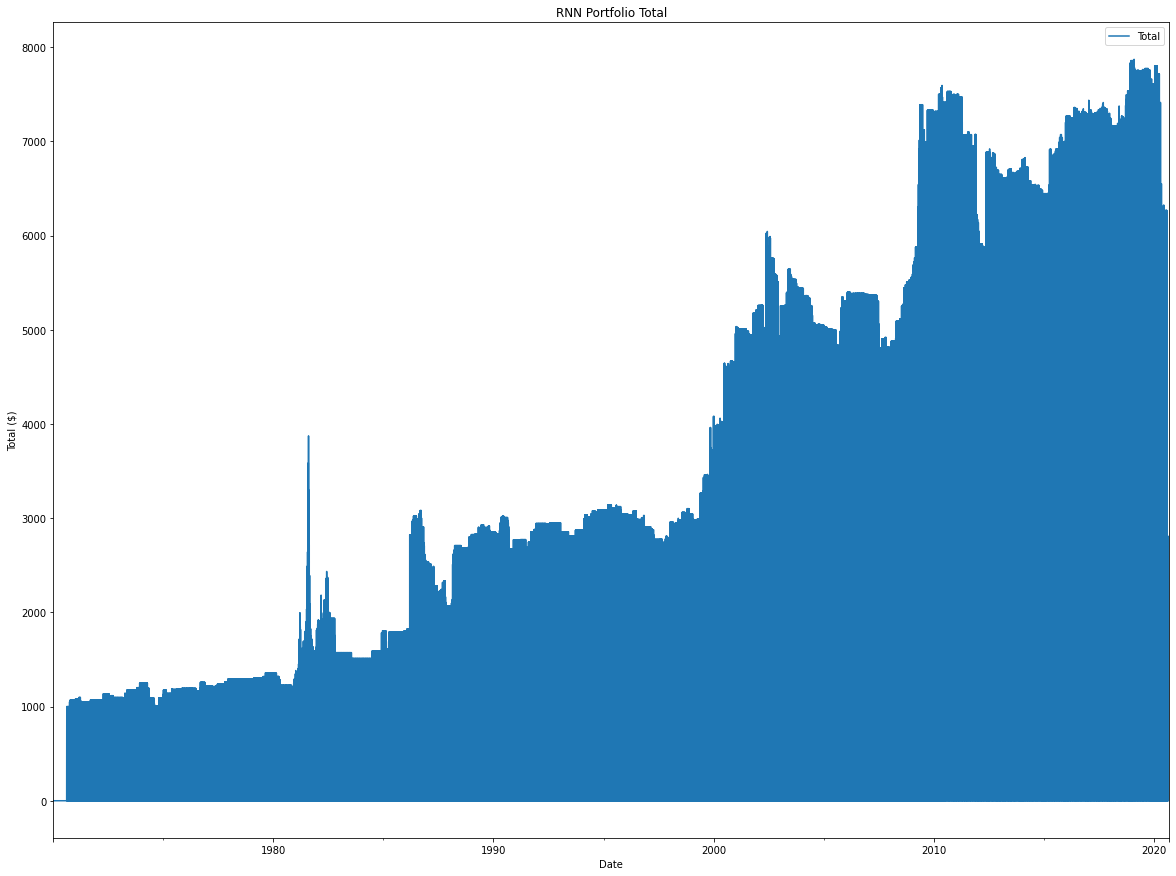

In [3]:
# Plot account total over time should overall profit/loss by implementing the simple RNN strategy
portfolio_df.plot(x='Date',y='Total',title='RNN Portfolio Total',figsize=[20,15])
plt.ylabel('Total ($)')
plt.show()

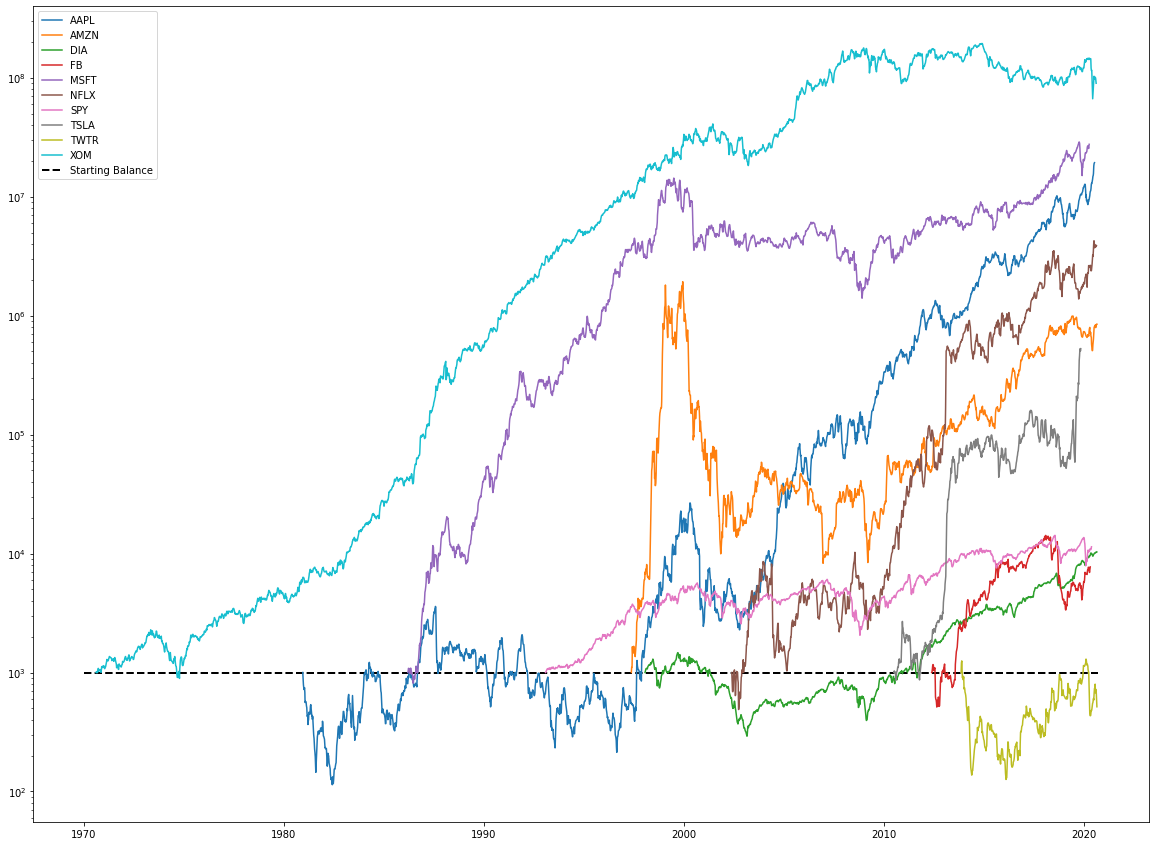

In [4]:
# initialize Buy and Hold DataFrame (i.e. hodl_df) with dates from 1/1/1970 to today
hodl_df = pd.DataFrame(columns=['Date'])
num_days = (datetime.today() - datetime(1970,1,1)).days
hodl_df['Date'] = [datetime.today() - timedelta(days=x) for x in range(num_days)]
hodl_df['Date'] = pd.to_datetime(hodl_df['Date'].dt.date)

# initialize line plot for all results
plt.figure(figsize=(20,15))

# Perform the following for every ticker symbol
for s in symbols:
    sym_df = pd.read_csv('Results Data/'+s+'_results.csv').iloc[:,[0,2]] # Read in the source data as a DataFrame
    sym_df['Date'] = pd.to_datetime(sym_df.Date) # Convert Date object column to Datetime data type
    hodl_df = hodl_df.merge(sym_df,how='left',on='Date') # Merge all results into Buy and Hold DataFrame
    hodl_df.rename(columns={'hodl':s+'_hodl'},inplace=True) # Rename columns in Buy and Hold DataFrame
    plt.plot(sym_df['Date'],sym_df['hodl'],label=s) # Create a line plot that will be stacked on with other plots

plt.yscale('log') # Use a log scale on the y-axis

# Plot a horizontal dashed line to mark the starting investment of $1000 for comparing between stocks/ETFs
plt.hlines(y=1000,
           xmin=datetime(1970,1,1), 
           xmax = datetime.today(), 
           colors = 'black', 
           linestyles='dashed', 
           linewidth = 2,
           label='Starting Balance')
plt.legend(loc='best')
plt.show()

In [5]:
# Replace missing values with zeros
hodl_df.fillna(0,inplace=True)

# Define Total column to show overall account balance over time
hodl_df['Total'] = hodl_df.iloc[:,1:].sum(axis=1)
hodl_df[hodl_df.Total!=0]

,Date,AAPL_hodl,AMZN_hodl,DIA_hodl,FB_hodl,MSFT_hodl,NFLX_hodl,SPY_hodl,TSLA_hodl,TWTR_hodl,XOM_hodl,Total
25,2020-08-21,0.0,848065.629912,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,515.076993,0.000000,8.485807e+05
26,2020-08-20,0.0,0.000000,10313.508863,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.000000,1.031351e+04
29,2020-08-17,0.0,849582.983516,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,571.643720,0.000000,8.501546e+05
32,2020-08-14,0.0,0.000000,10255.997724,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.000000,1.025600e+04
33,2020-08-13,0.0,0.000000,0.000000,0.0,0.0,3.877358e+06,0.0,0.0,0.000000,0.000000,3.877358e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
18274,1970-09-04,0.0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,995.581070,9.955811e+02
18278,1970-08-31,0.0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,1019.093887,1.019094e+03
18284,1970-08-25,0.0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,1017.120492,1.017120e+03
18290,1970-08-19,0.0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,1013.259450,1.013259e+03


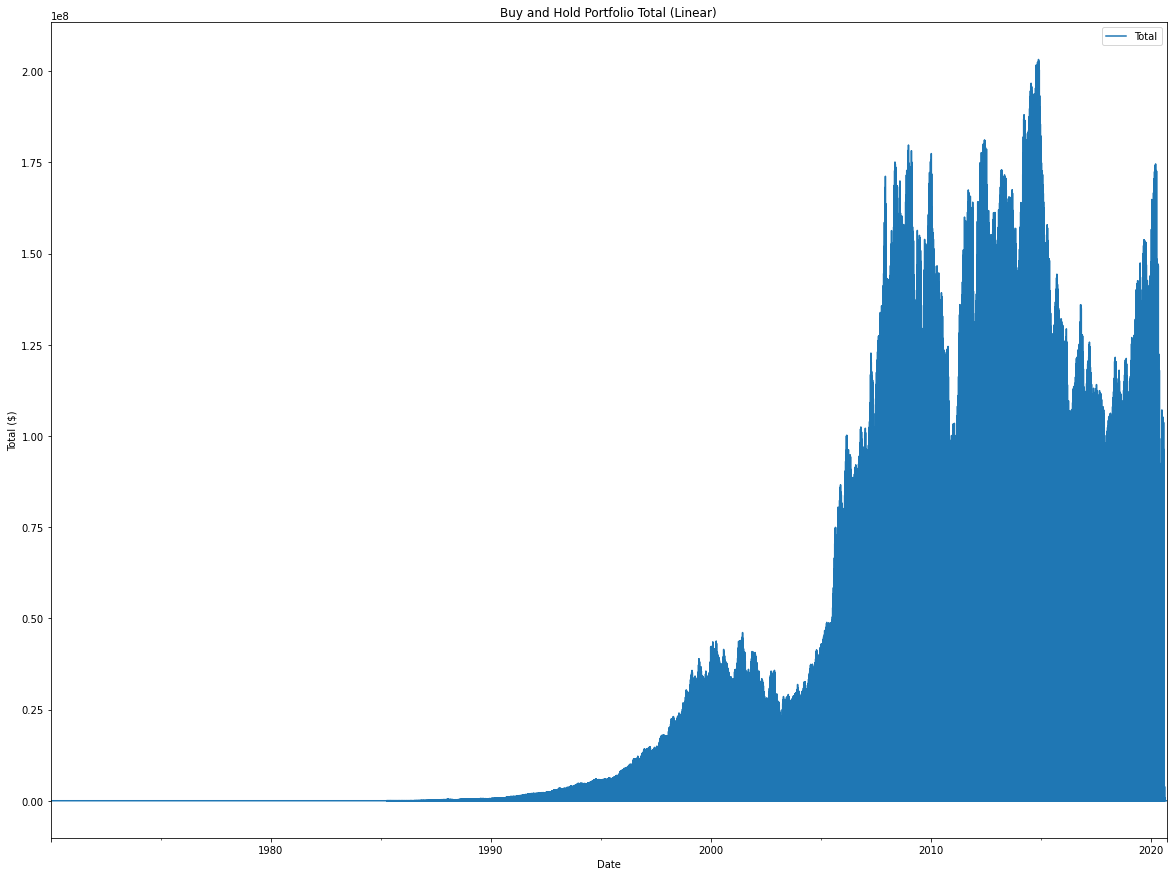

In [6]:
# Plot account total over time should overall profit/loss by implementing the Buy and Hold strategy on a linear y-scale
hodl_df.plot(x='Date',y='Total',title='Buy and Hold Portfolio Total (Linear)',figsize=[20,15])
plt.ylabel('Total ($)')
plt.show()

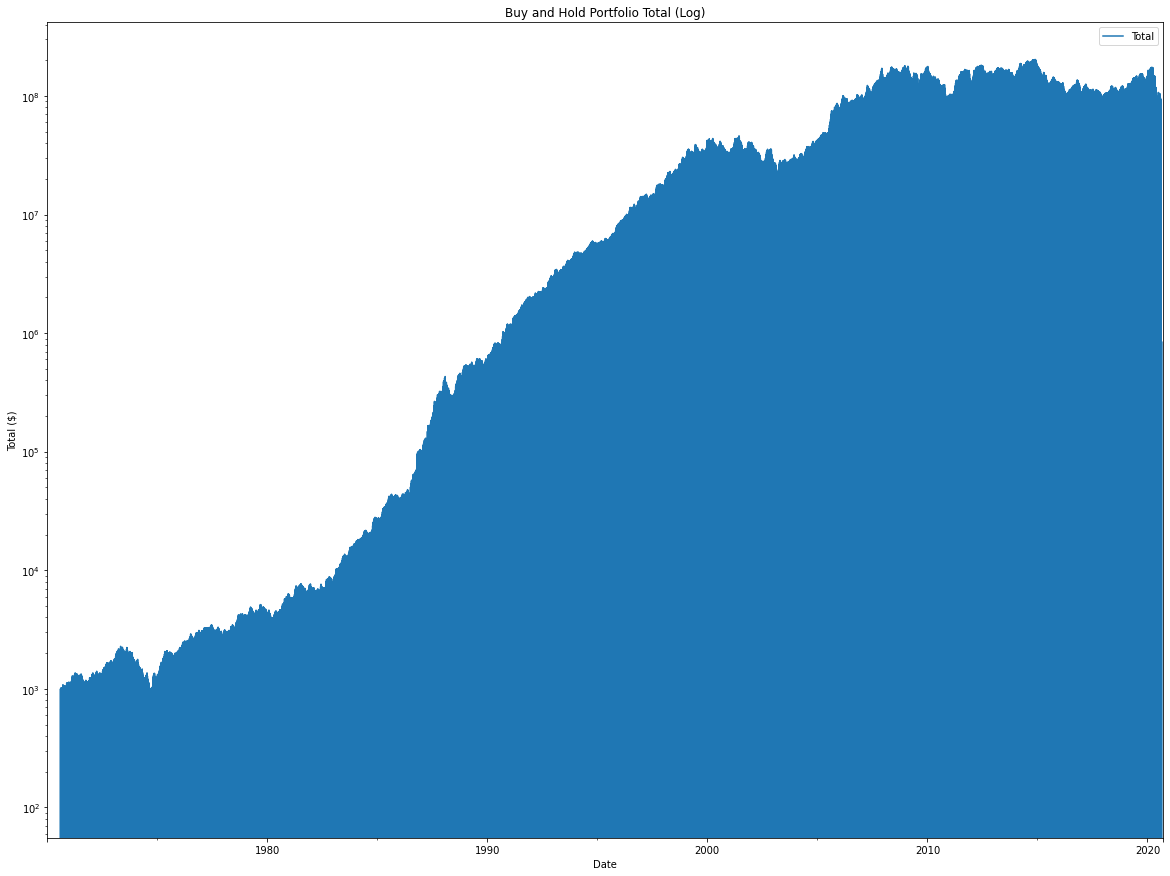

In [7]:
# Plot account total over time should overall profit/loss by implementing the Buy and Hold strategy on a log y-scale
hodl_df.plot(x='Date',y='Total',title='Buy and Hold Portfolio Total (Log)',figsize=[20,15])
plt.ylabel('Total ($)')
plt.yscale('log')
plt.show()

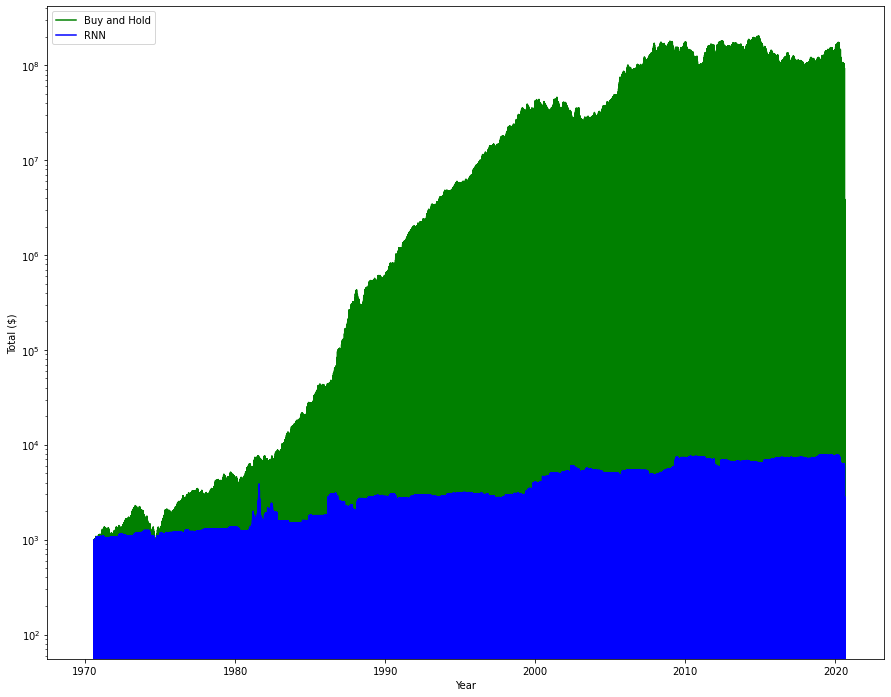

In [24]:
plt.figure(figsize=[15,12])
plt.plot(hodl_df.Date,hodl_df.Total,label='Buy and Hold',color='green')
plt.plot(portfolio_df.Date,portfolio_df.Total,label='RNN',color='blue')
plt.legend(loc='best')
plt.yscale('log')
plt.ylabel('Total ($)')
plt.xlabel('Year')
plt.show()

In [31]:
portfolio_df[portfolio_df.Total !=0].head()

,Date,AAPL_portfolio,AMZN_portfolio,DIA_portfolio,FB_portfolio,MSFT_portfolio,NFLX_portfolio,SPY_portfolio,TSLA_portfolio,TWTR_portfolio,XOM_portfolio,Total
25,2020-08-21,0.0,360.277299,0.000000,0.0,0.0,0.0000,0.0,0.0,2450.073955,0.0,2810.351254
26,2020-08-20,0.0,0.000000,1329.187081,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,1329.187081
29,2020-08-17,0.0,360.277299,0.000000,0.0,0.0,0.0000,0.0,0.0,2450.073955,0.0,2810.351254
32,2020-08-14,0.0,0.000000,1324.423993,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,1324.423993
33,2020-08-13,0.0,0.000000,0.000000,0.0,0.0,413.1194,0.0,0.0,0.000000,0.0,413.119400


In [32]:
hodl_df[hodl_df.Total !=0].head()

,Date,AAPL_hodl,AMZN_hodl,DIA_hodl,FB_hodl,MSFT_hodl,NFLX_hodl,SPY_hodl,TSLA_hodl,TWTR_hodl,XOM_hodl,Total
25,2020-08-21,0.0,848065.629912,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,515.076993,0.0,8.485807e+05
26,2020-08-20,0.0,0.000000,10313.508863,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,1.031351e+04
29,2020-08-17,0.0,849582.983516,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,571.643720,0.0,8.501546e+05
32,2020-08-14,0.0,0.000000,10255.997724,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,1.025600e+04
33,2020-08-13,0.0,0.000000,0.000000,0.0,0.0,3.877358e+06,0.0,0.0,0.000000,0.0,3.877358e+06
